In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns


In [3]:
df = pd.read_csv("Iris (1).csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
numeric_cols = df.select_dtypes(include = ['float64', 'int64']).columns
numeric_data = df[numeric_cols]

corr_matrix = numeric_data.corr()

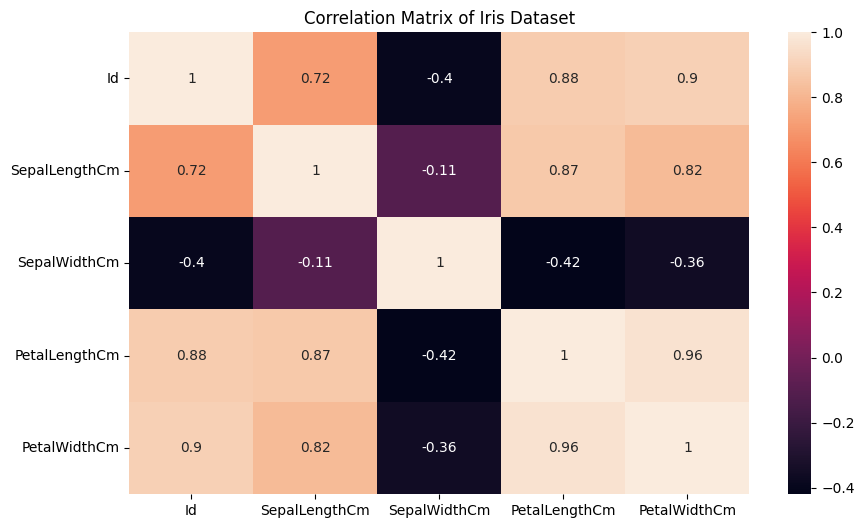

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

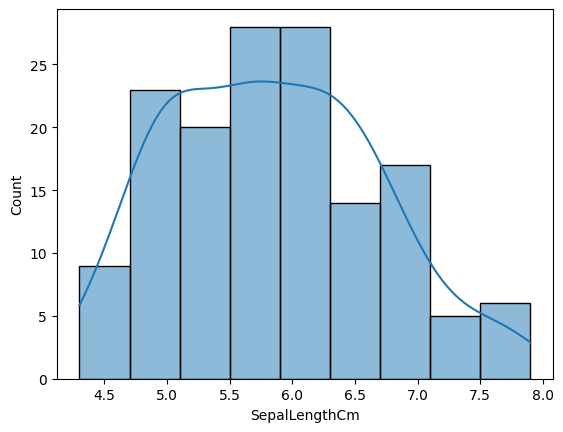

In [10]:
sns.histplot(df['SepalLengthCm'], kde = True)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

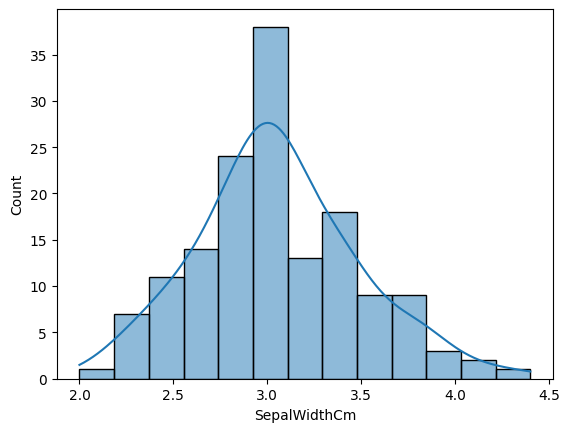

In [11]:
sns.histplot(df['SepalWidthCm'], kde = True)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

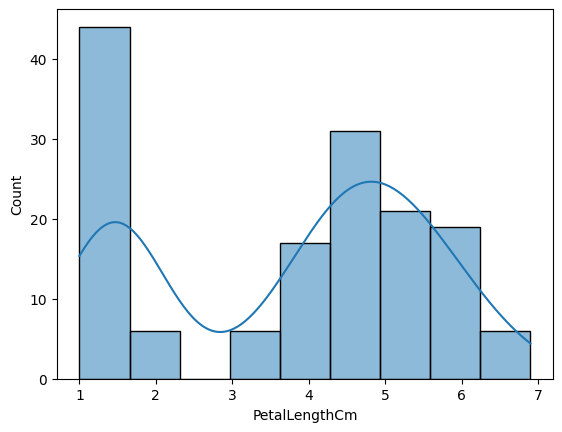

In [12]:
sns.histplot(df['PetalLengthCm'], kde = True)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

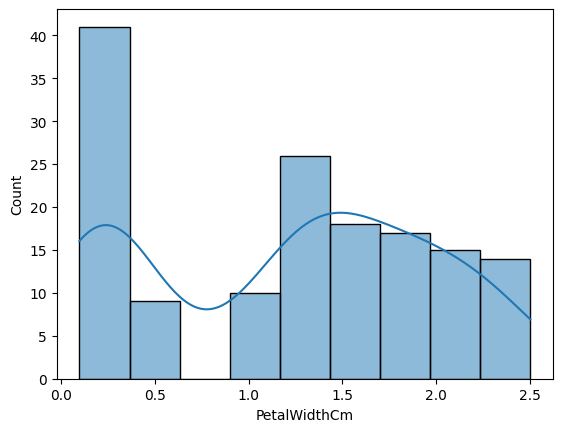

In [13]:
sns.histplot(df['PetalWidthCm'], kde = True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

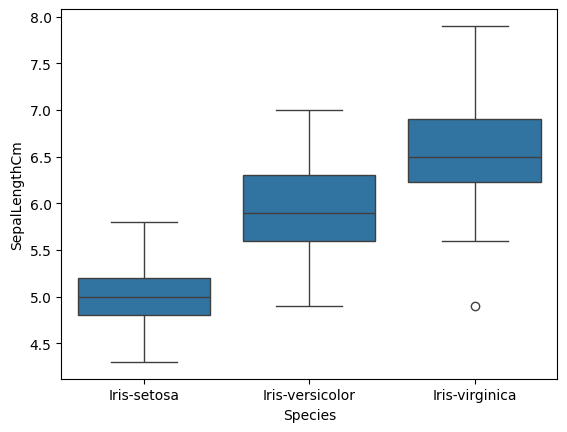

In [14]:
sns.boxplot(x = df['Species'], y = df['SepalLengthCm'])

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

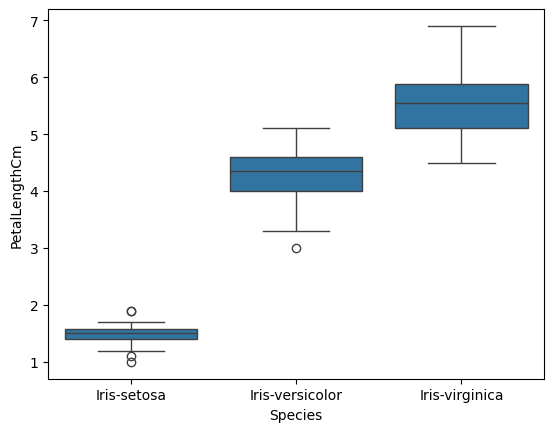

In [15]:
sns.boxplot(x = df['Species'], y = df['PetalLengthCm'])

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

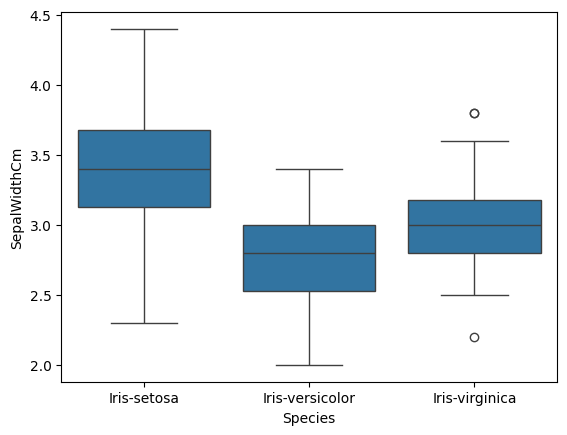

In [16]:
sns.boxplot(x = df['Species'], y = df['SepalWidthCm'])

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

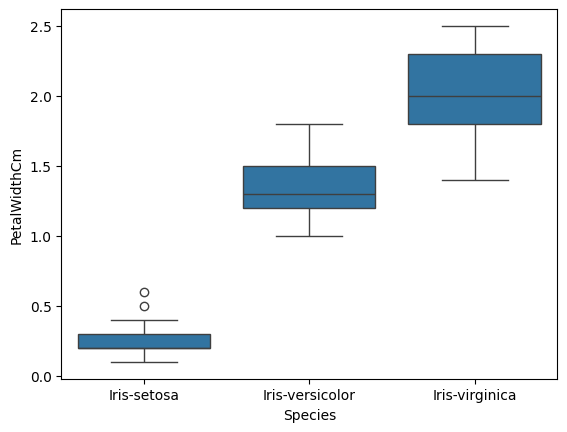

In [17]:
sns.boxplot(x = df['Species'], y = df['PetalWidthCm'])

In [30]:
outliers_index = [1, 2, 3, 4, 5, 6]
outliers_value = [50.0, 50.5, 45, 32, 56, 78]

df.loc[outliers_index, 'SepalLengthCm'] = outliers_value
df.loc[outliers_index, 'PetalLengthCm'] = outliers_value

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,50.0,3.0,50.0,0.2,Iris-setosa
2,3,50.5,3.2,50.5,0.2,Iris-setosa
3,4,45.0,3.1,45.0,0.2,Iris-setosa
4,5,32.0,3.6,32.0,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
features = df.columns[:-1]
features_types = df[features].dtypes

outliers = {}
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    feature_outliers = df[(df[feature]<lower_bound)|(df[feature]>upper_bound)]
    outliers[feature] = feature_outliers

print(outliers)

{'Id': Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: [], 'SepalLengthCm':       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
1      2           50.0           3.0           50.0           0.2   
2      3           50.5           3.2           50.5           0.2   
3      4           45.0           3.1           45.0           0.2   
4      5           32.0           3.6           32.0           0.2   
5      6           56.0           3.9           56.0           0.4   
6      7           78.0           3.4           78.0           0.3   
124  125           50.5           3.3            5.7           2.1   
130  131           50.0           2.8            6.1           1.9   

            Species  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
5       Iris-setosa  
6       Iris-setosa  
124  Iris-virginica  
130  Iris-virginica  , 'SepalWidthCm':     Id  SepalLengthCm 

In [34]:
for feature, outlier_data in outliers.items():
    print(f"{feature}: {outlier_data.index.tolist()}")

Id: []
SepalLengthCm: [1, 2, 3, 4, 5, 6, 124, 130]
SepalWidthCm: [15, 32, 33, 60]
PetalLengthCm: [1, 2, 3, 4, 5, 6]
PetalWidthCm: []
